In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image                 
from IPython.display import display               
from time import gmtime, strftime                 
from sagemaker.predictor import csv_serializer   


In [7]:
dataset=pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
dataset.shape


(768, 9)

In [9]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
dataset.nunique()>=50

Pregnancies                 False
Glucose                      True
BloodPressure               False
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction     True
Age                          True
Outcome                     False
dtype: bool

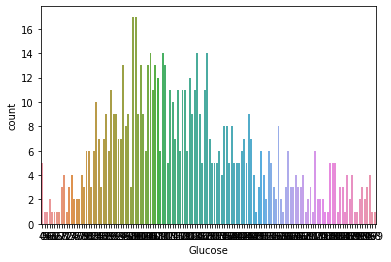

In [14]:
sns.countplot(x='Glucose',data=dataset)

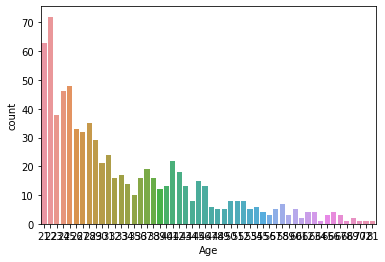

In [15]:
sns.countplot(x='Age',data=dataset)

In [16]:
dataset['Outcome']=dataset['Outcome'].astype('category')

In [17]:
dataset.dtypes

Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                     category
dtype: object

In [18]:
for col in dataset.columns:
    print(dataset[col].describe())

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64
count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64
count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64
count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64
count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64
count    768.000000
mean      31.9

In [19]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

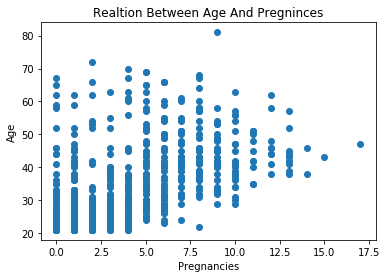

In [20]:
plt.scatter(dataset['Pregnancies'],dataset['Age'])
plt.xlabel('Pregnancies')
plt.ylabel('Age')
plt.title('Realtion Between Age And Pregninces')
plt.show()


In [21]:
Dataset=dataset.copy()
Dataset['Age_Group'] = pd.cut(dataset['Age'], bins=[0,15,20,40,55,60],precision=0).astype('str')
print(Dataset['Age_Group'].unique())

['(40.0, 55.0]' '(20.0, 40.0]' '(55.0, 60.0]' 'nan']


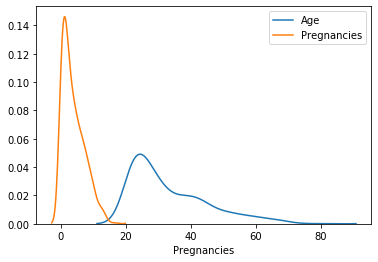

In [22]:
sns.distplot(dataset['Age'],hist=False,label='Age')
sns.distplot(dataset['Pregnancies'],hist=False,label='Pregnancies')

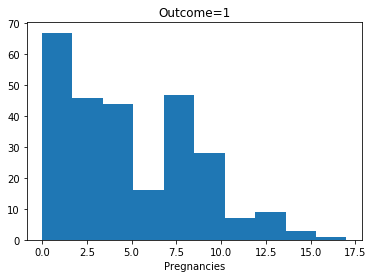

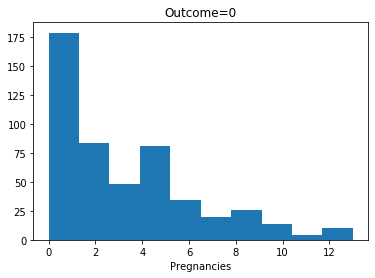

In [23]:
plt.hist(Dataset.loc[Dataset['Outcome']==1,:]['Pregnancies'])
plt.title("Outcome=1")
plt.xlabel("Pregnancies")
plt.show()
plt.close()
plt.hist(Dataset.loc[Dataset['Outcome']==0,:]['Pregnancies'])
plt.title("Outcome=0")
plt.xlabel("Pregnancies")
plt.show()
plt.close()

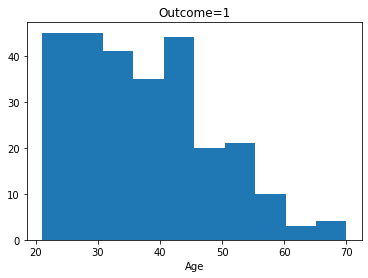

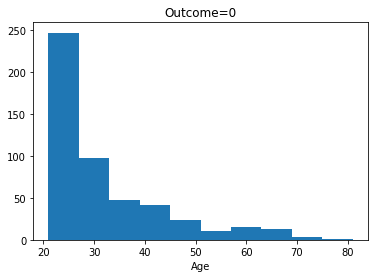

In [24]:
plt.hist(Dataset.loc[Dataset['Outcome']==1,:]['Age'])
plt.title("Outcome=1")
plt.xlabel("Age")
plt.show()
plt.close()
plt.hist(Dataset.loc[Dataset['Outcome']==0,:]['Age'])
plt.title("Outcome=0")
plt.xlabel("Age")
plt.show()
plt.close()

In [25]:
data_in=dataset.iloc[:,:-1]
data_in

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [26]:
data_in=np.array(data_in)

In [27]:
data_in.shape

(768, 8)

In [28]:
data_out=dataset.iloc[:,-1]
data_out

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: category
Categories (2, int64): [0, 1]

In [29]:
data_out.shape

(768,)

In [30]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
data_in=sc.fit_transform(data_in)
data_in

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
final_data=pd.concat([data_out,dataset],axis=1)

In [33]:
final_data.head()

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,0,1,85,66,29,0,26.6,0.351,31,0
2,1,8,183,64,0,0,23.3,0.672,32,1
3,0,1,89,66,23,94,28.1,0.167,21,0
4,1,0,137,40,35,168,43.1,2.288,33,1


In [34]:
train,test=train_test_split(final_data,test_size=0.2)

In [35]:
print(train.shape)
print(test.shape)

(614, 10)
(154, 10)


In [36]:
import boto3,re,os,json,sagemaker
from sagemaker import get_execution_role

In [37]:
role=get_execution_role()
print(role)


arn:aws:iam::748050252648:role/service-role/AmazonSageMaker-ExecutionRole-20201003T110908


In [38]:
my_region=boto3.session.Session().region_name
print(my_region)


us-east-1


In [39]:
containers = {'us-west-2': '433757028032.dkr.ecr.us-west-2.amazonaws.com/xgboost:latest',
              'us-east-1': '811284229777.dkr.ecr.us-east-1.amazonaws.com/xgboost:latest',
              'us-east-2': '825641698319.dkr.ecr.us-east-2.amazonaws.com/xgboost:latest',
              'eu-west-1': '685385470294.dkr.ecr.eu-west-1.amazonaws.com/xgboost:latest'}

In [40]:
print(containers[my_region])

811284229777.dkr.ecr.us-east-1.amazonaws.com/xgboost:latest


In [41]:
prefix='sagemaker/DiabetesesagemakerInstance'
bucket_name='datasetdiabetes'

In [42]:
final_data.to_csv('train.csv',index=False,header=False)
boto3.Session().resource('s3').Bucket(bucket_name).Object(os.path.join(prefix,'train/train.csv')).upload_file('train.csv')
s3_input_train=sagemaker.s3_input(s3_data='s3://{}/{}/train'.format(bucket_name, prefix),content_type='csv')


's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.


In [43]:
sess=sagemaker.Session()
diabetis_model=sagemaker.estimator.Estimator(containers[my_region],role,train_instance_count=1,train_instance_type='ml.m5.large',output_path='s3://{}/{}/output'.format(bucket_name,prefix),sagemaker_session=sess)
diabetis_model.set_hyperparameters(max_depth=5,eta=0.2,gamma=4,min_child_weight=6,subsample=0.8,silent=0,objective='binary:logistic',num_round=100)


Parameter image_name will be renamed to image_uri in SageMaker Python SDK v2.


In [44]:
diabetis_model.fit({'train':s3_input_train})

2020-10-03 12:52:44 Starting - Starting the training job...
2020-10-03 12:52:46 Starting - Launching requested ML instances......
2020-10-03 12:53:51 Starting - Preparing the instances for training...
2020-10-03 12:54:33 Downloading - Downloading input data...
2020-10-03 12:55:08 Training - Downloading the training image..Arguments: train
[2020-10-03:12:55:23:INFO] Running standalone xgboost training.
[2020-10-03:12:55:23:INFO] Path /opt/ml/input/data/validation does not exist!
[2020-10-03:12:55:23:INFO] File size need to be processed in the node: 0.03mb. Available memory size in the node: 168.29mb
[2020-10-03:12:55:23:INFO] Determined delimiter of CSV input is ','
[12:55:23] S3DistributionType set as FullyReplicated
[12:55:23] 768x9 matrix with 6912 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[12:55:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[0]#011train-error:0
[12:55:23] src/tree/upda

In [45]:
detector=diabetis_model.deploy(initial_instance_count=1,instance_type='ml.m5.large')

Parameter image will be renamed to image_uri in SageMaker Python SDK v2.


-------------!

In [47]:
detector.endpoint

'xgboost-2020-10-03-12-52-43-924'

In [ ]:
#prediction

In [100]:
from sagemaker.predictor import csv_serializer

In [102]:
test_data_array=test.drop('Outcome',axis=1).values #load the data into an array
detector.content_type = 'text/csv' # set the data type for an inference
detector.serializer = csv_serializer # set the serializer type
print(type(test_data_array))
print(test_data_array.shape)
predictions=detector.predict(test_data_array).decode('utf-8') # predict!
predictions_array = np.fromstring(predictions[1:], sep=',') # and turn the prediction into an array
print(predictions_array.shape)


<class 'numpy.ndarray'>
(154, 8)
(154,)


In [103]:
print(predictions)

0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.013653296046,0.01365329